In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd

data_path = '/content/drive/MyDrive/Fundamentals_of_ML/HW2/data_banknote_authentication.txt'

# Names are taken from the link in the homework
column_names = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']
df = pd.read_csv(data_path, header=None, names=column_names)

df.head()


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [20]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("\nData Description:")
print(df.describe())

print("\nClass Distribution:")
print(df['Class'].value_counts())


Number of rows: 1372
Number of columns: 5

Data Description:
          Variance     Skewness     Curtosis      Entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000

Class Distribution:
Class
0    762
1    610
Name: count, dtype: int64


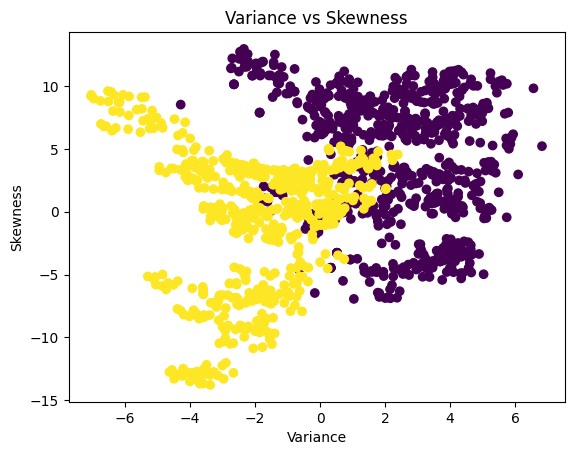

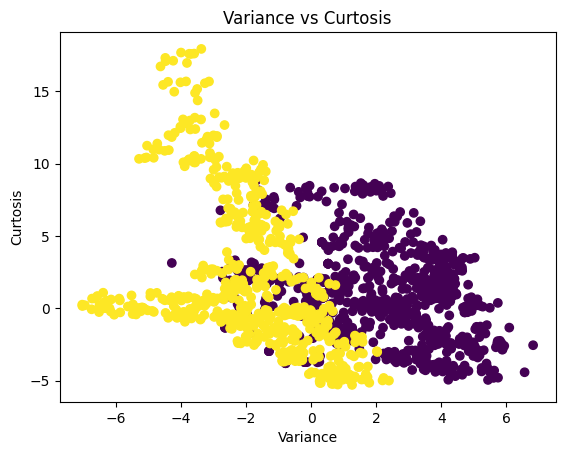

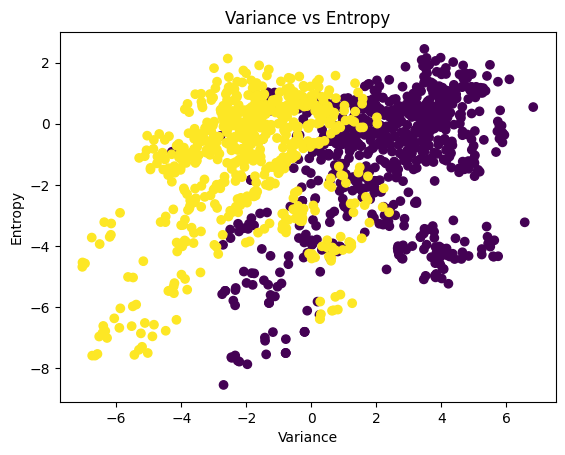

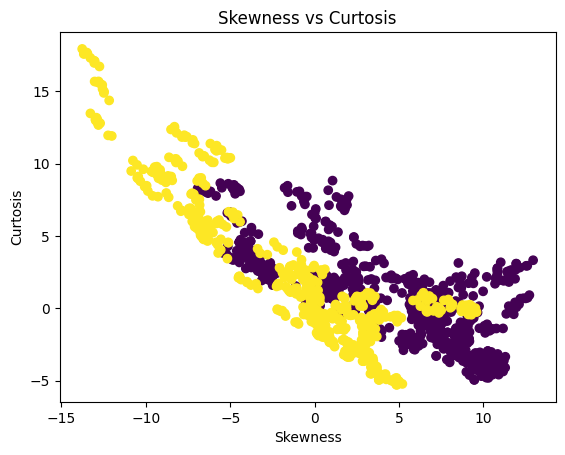

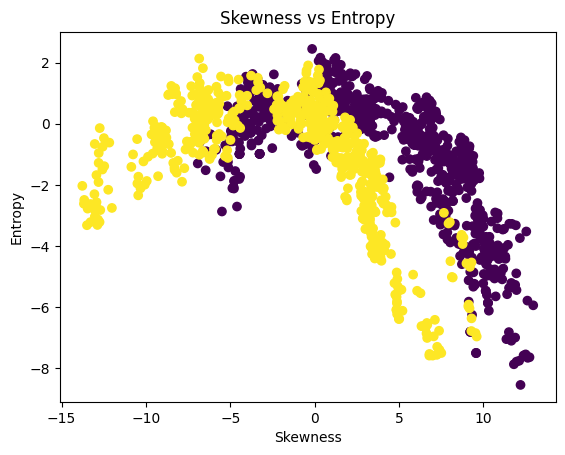

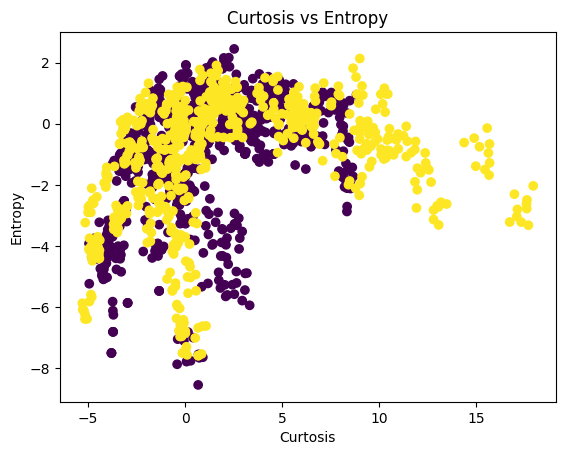

In [21]:
import matplotlib.pyplot as plt

features = ['Variance', 'Skewness', 'Curtosis', 'Entropy']

# We'll plot each pair of features
for i in range(len(features)):
    for j in range(i+1, len(features)):
        plt.figure()  # Each plot in its own figure
        plt.scatter(df[features[i]], df[features[j]], c=df['Class'])
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.title(f'{features[i]} vs {features[j]}')
        plt.show()


In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21, stratify=y
)


Training the two specific models...

Trained model with parameters {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2} | Test Accuracy: 0.9673
Trained model with parameters {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 10} | Test Accuracy: 0.9818

Performing hyperparameter grid search for the best model...

criterion: gini    | max_depth: 3    | min_samples_split:  2 | accuracy: 0.9673
criterion: gini    | max_depth: 3    | min_samples_split: 10 | accuracy: 0.9673
criterion: gini    | max_depth: 4    | min_samples_split:  2 | accuracy: 0.9745
criterion: gini    | max_depth: 4    | min_samples_split: 10 | accuracy: 0.9745
criterion: gini    | max_depth: 5    | min_samples_split:  2 | accuracy: 0.9855
criterion: gini    | max_depth: 5    | min_samples_split: 10 | accuracy: 0.9855
criterion: gini    | max_depth: None | min_samples_split:  2 | accuracy: 0.9891
criterion: gini    | max_depth: None | min_samples_split: 10 | accuracy: 0.9927
criterion: entropy | max_

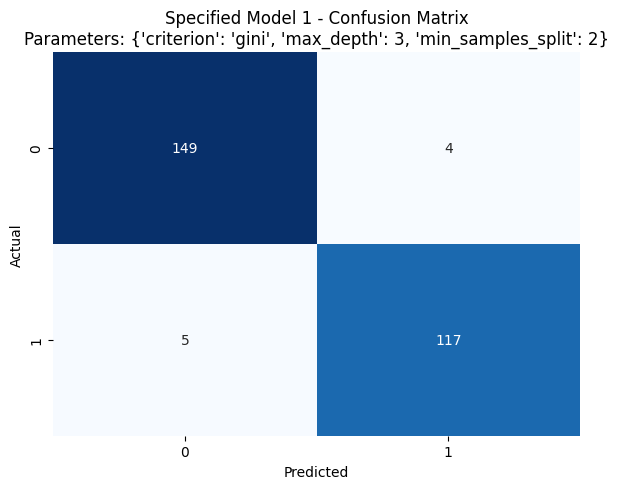

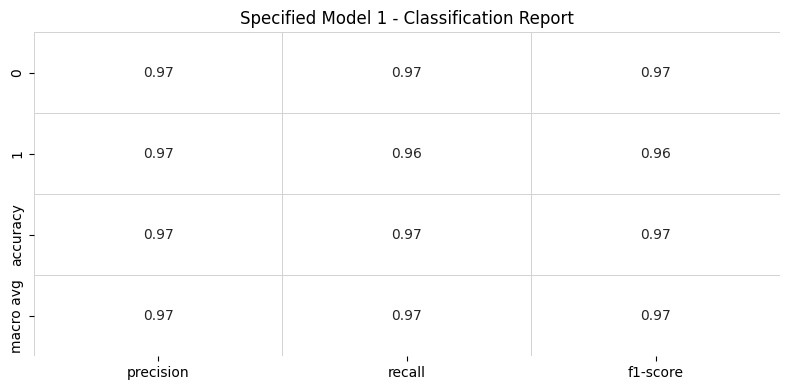

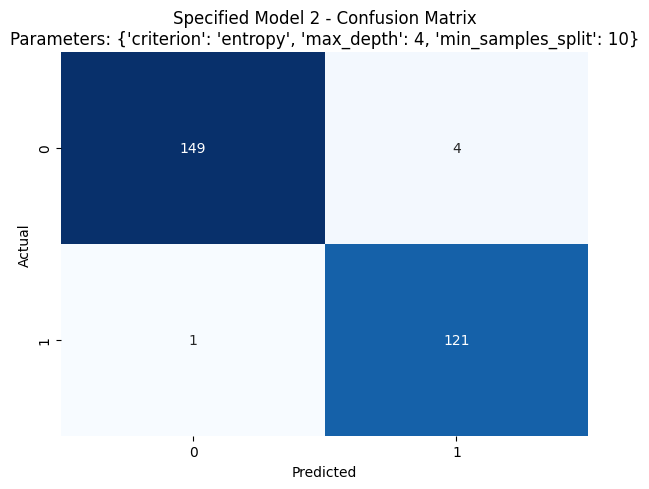

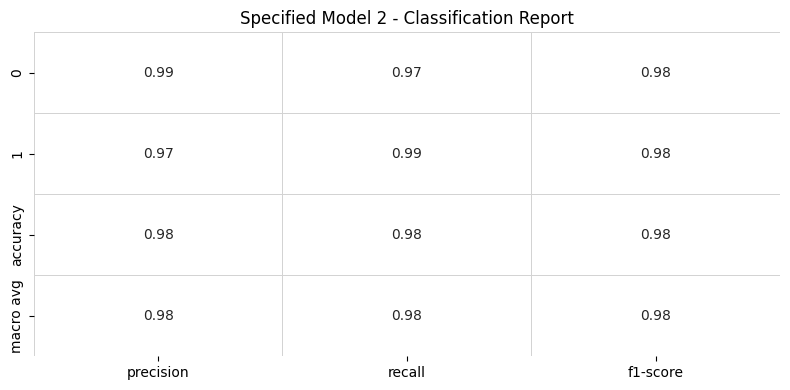

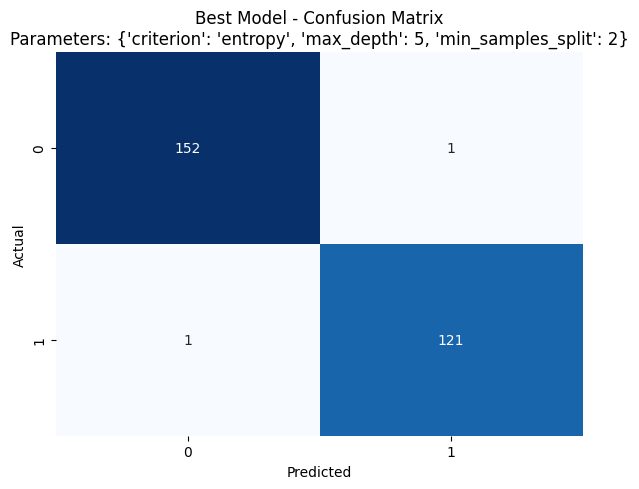

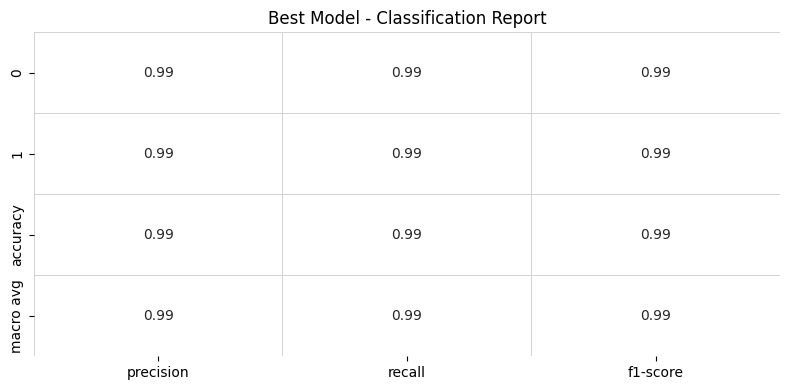

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd


# 1. Train the two specific models

model_params = [
    {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2},
    {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 10}
]

specific_models = []

print("Training the two specific models...\n")
for params in model_params:
    clf = DecisionTreeClassifier(
        criterion=params['criterion'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        random_state=21
    )
    clf.fit(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    specific_models.append((params, clf))
    print(f"Trained model with parameters {params} | Test Accuracy: {test_accuracy:.4f}")


# 2. Hyperparameter Grid Search for the Best Model

param_grid = [
    {'criterion': ['gini'], 'max_depth': [3, 4, 5, None], 'min_samples_split': [2, 10]},
    {'criterion': ['entropy'], 'max_depth': [3, 4, 5, None], 'min_samples_split': [2, 10]},
]

best_model = None
best_score = 0
best_params = None

print("\nPerforming hyperparameter grid search for the best model...\n")
for params in param_grid:
    for crit in params['criterion']:
        for depth in params['max_depth']:
            for split in params['min_samples_split']:
                clf = DecisionTreeClassifier(
                    criterion=crit,
                    max_depth=depth,
                    min_samples_split=split,
                    random_state=21
                )
                clf.fit(X_train, y_train)
                score = clf.score(X_test, y_test)
                print(f"criterion: {crit:7} | max_depth: {str(depth):4} | min_samples_split: {split:2} | accuracy: {score:.4f}")
                if score > best_score:
                    best_score = score
                    best_model = clf
                    best_params = {'criterion': crit, 'max_depth': depth, 'min_samples_split': split}
                # If accuracies tie, choose the one with lower max_depth
                elif score == best_score:
                    # Assign a high value if max_depth is None for comparison
                    current_depth = depth if depth is not None else 1000
                    best_depth = best_params['max_depth'] if best_params['max_depth'] is not None else 1000
                    if current_depth < best_depth:
                        best_model = clf
                        best_params = {'criterion': crit, 'max_depth': depth, 'min_samples_split': split}

print(f"\nBest Model Found: Parameters: {best_params} | Accuracy: {best_score:.4f}")

# Combine the two specific models and the best model
all_models = []
# Add the two specific models (with a label)
for i, (params, model) in enumerate(specific_models, 1):
    all_models.append((f"Specified Model {i}", params, model))
# Add the best model
all_models.append(("Best Model", best_params, best_model))


# 3. Visualization for each model

for label, params, model in all_models:
    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Plot Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=np.unique(y_test),
                yticklabels=np.unique(y_test))
    plt.title(f"{label} - Confusion Matrix\nParameters: {params}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(f"confusion_matrix_{label.replace(' ', '_').lower()}.png", dpi=300)
    plt.show()

    # Plot Classification Report
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    flat_white = ListedColormap(['#FFFFFF'])

    plt.figure(figsize=(8, 4))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap=flat_white, cbar=False,
                linewidths=0.5, linecolor='lightgrey')
    plt.title(f"{label} - Classification Report")
    plt.tight_layout()
    plt.savefig(f"classification_report_{label.replace(' ', '_').lower()}.png", dpi=300)
    plt.show()


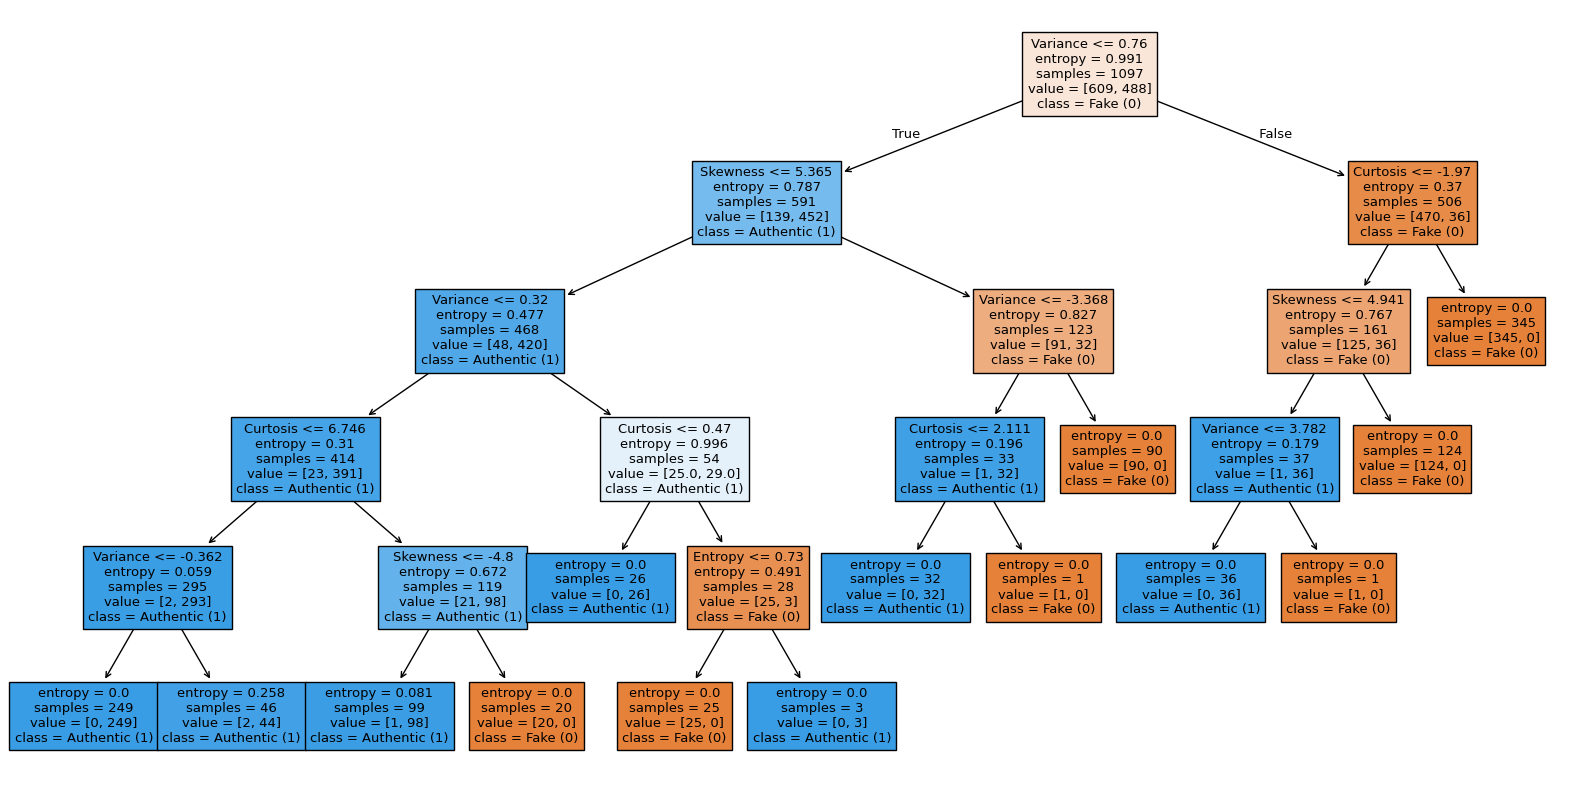

In [24]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=features,
    class_names=['Fake (0)', 'Authentic (1)'],
    filled=True
)
plt.show()


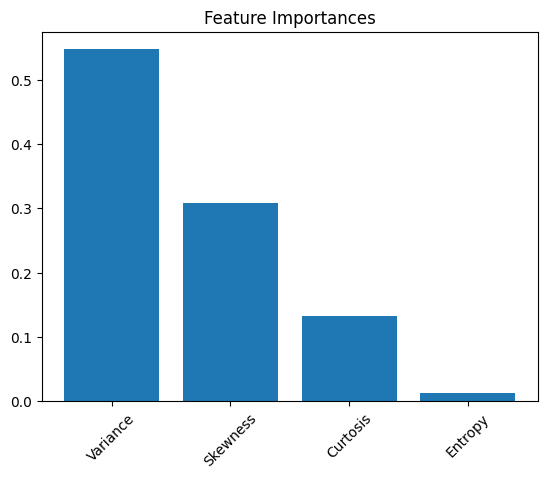

In [25]:
import numpy as np

importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.title('Feature Importances')
plt.show()
